파이썬 머신러닝 완벽가이드 ch5. p. 335~353

# 회귀 트리

트리 기반의 회귀는 회귀 트리를 이용하는 것이다. 즉, 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것이다. 회귀 트리는 분류 트리와 크게 다르지 않으나, 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있는데 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.

리프 노드 생성 기준에 부합하는 트리 분할이 완료되었다면 리프 노드에 소속된 데이터 값의 평균값을 구하여 최종적으로 리프 노드에 결정값으로 할당된다.

결정트리, 랜덤포레스트, GBM, XGBoost, LGBM 등의 트리 기반 알고리즘은 CART 알고리즘에 기반하기 때문에 회귀도 가능하다.

### 보스턴 주택 가격 예측

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
boston=pd.read_csv("/content/drive/MyDrive/데이터/BostonHousing.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
y_target=boston['medv']
X_data=boston.drop(['medv'], axis=1, inplace=False)

rf= RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores= cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores= np.sqrt(-1*neg_mse_scores)
avg_rmse= np.mean(rmse_scores)

print('5 교차 검증의 개별 NMSE scores:', np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 NMSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [10]:
# 입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 rmse 계산 함수
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores= np.sqrt(-1* neg_mse_scores)
  avg_rmse= np.mean(rmse_scores)
  print('##########', model.__class__.__name__,'##########')
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg= DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg= RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg= GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg= XGBRegressor(n_estimators=1000)
lgb_reg= LGBMRegressor(n_estimators=1000)

models= [dt_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: xlabel='None', ylabel='None'>

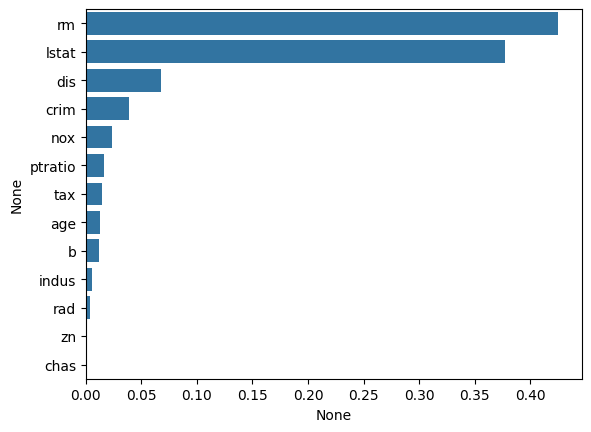

In [13]:
# 회귀 계수 대신 피처 중요도 파악 가능
import seaborn as sns
%matplotlib inline

rf_reg= RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series= pd.Series(data=rf_reg.feature_importances_, index= X_data.columns)
feature_series= feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


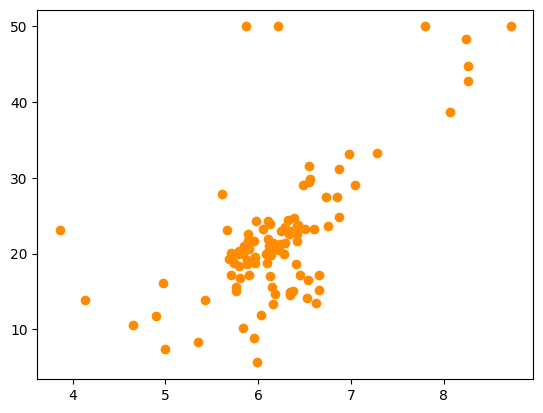

In [16]:
# 회귀 트리가 어떻게 예측값을 판단하는 지 선형회귀와 비교해 시각화
# 1개의 변수만 추출 (2차원 평면상에서 회귀 예측선을 쉽게 표현 위해)
# 보스턴 데이터 세트 개수 100개만 샘플링, RM, PRICE 칼럼만 추출
import matplotlib.pyplot as plt
boston_sample=boston[['rm', 'medv']]
boston_sample= boston_sample.sample(n=100, random_state=0)
print(boston_sample.shape)
plt.figure()
plt.scatter(boston_sample['rm'], boston_sample['medv'], c='darkorange')

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg= LinearRegression()
rf_reg2= DecisionTreeRegressor(max_depth=2)
rf_reg7= DecisionTreeRegressor(max_depth=7)
X_test= np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature= boston_sample['rm'].values.reshape(-1,1)
y_target=boston_sample['medv'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr= lr_reg.predict(X_test)
pred_rf2= rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

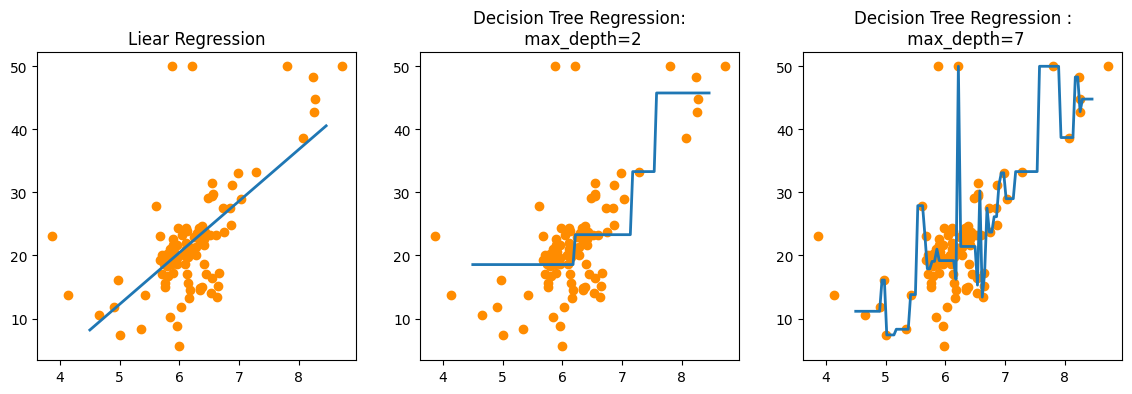

In [28]:
fig, (ax1, ax2, ax3)= plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Liear Regression')
ax1.scatter(boston_sample['rm'], boston_sample['medv'], c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression:\n max_depth=2')
ax2.scatter(boston_sample['rm'], boston_sample['medv'], c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

ax3.set_title('Decision Tree Regression :\n max_depth=7')
ax3.scatter(boston_sample['rm'], boston_sample['medv'], c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현하지만, 회귀 트리는 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회기선을 만든다. max_depth=7인 경우 이상치도 학습하며 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

## 회귀실습 - 자전거 대여 수요 예측

In [29]:
df=pd.read_csv("/content/drive/MyDrive/데이터/bike_train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

count : 대여 횟수

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


datetime 칼럼 년/월/일/시간으로 4개의 속성으로 분리.

In [32]:
df['datetime']=df.datetime.apply(pd.to_datetime)
df['year']=df.datetime.apply(lambda x: x.year)
df['month']=df.datetime.apply(lambda x: x.month)
df['day']= df.datetime.apply(lambda x: x.day)
df['hour']= df.datetime.apply(lambda x: x.hour)
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [33]:
drop_columns=['datetime', 'casual','registered']
df.drop(drop_columns, axis=1, inplace=True)

casual+ registered= count이므로 상관도만 높아서 예측을 저해할 우려가 있다.

In [37]:
# RMSE 로 성능평가 해야함.
from sklearn.metrics import mean_squared_error, mean_absolute_error
def rmsle(y, pred):
  log_y= np.log1p(y)
  log_pred= np.log1p(pred)
  squared_error= (log_y- log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y, pred)
  mae_val = mean_absolute_error(y, pred)
  print('RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [36]:
# 오류를 발생시키기 쉬운 rmsle 구현
'''
def rmsle(y, pred):
  msle = mean_squared_log_error(y, pred)
  rmsle= np.sqrt(mse)
  return rmsle

'''

## 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target= df['count']
X_features= df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X_features, y_target, test_size=0.3,
                                                   random_state=0)

lr_reg= LinearRegression()
lr_reg.fit(X_train, y_train)
pred= lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


<ipython-input-37-c389a28b0b7f>:5: RuntimeWarning: invalid value encountered in log1p
  log_pred= np.log1p(pred)


In [41]:
# 실제 값과 예측값의 차이 확인
def get_top_error_data(y_test, pred, n_tops=5):
  result_df=pd.DataFrame(y_test.values, columns=['real_count'])
  result_df['predicted_count']= np.round(pred)
  result_df['diff']= np.abs(result_df['real_count']- result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


회귀에서 이렇게 큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 Target 값의 분포가 왜곡된 형태를 이루고 있는지 이다.

Target 값은 정규분포 형태가 가장 좋다.

<Axes: >

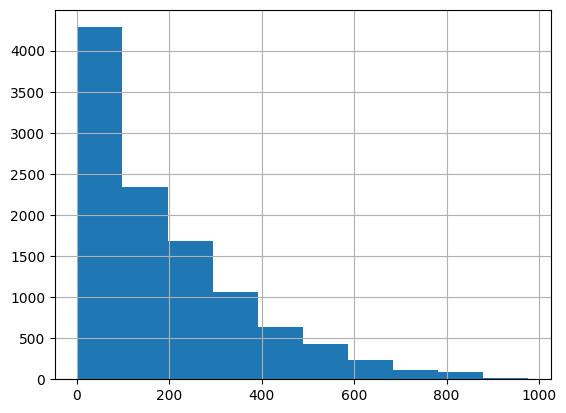

In [42]:
y_target.hist()

<Axes: >

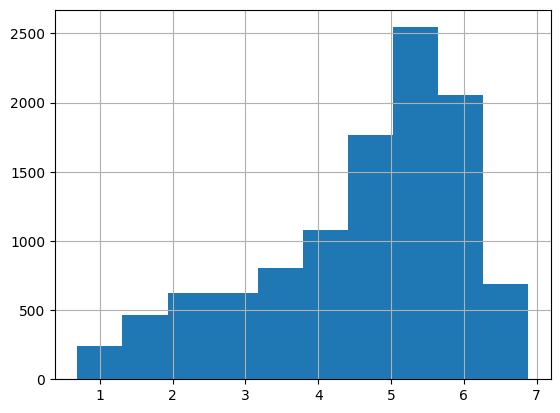

In [43]:
# 로그 변환
y_log_transform= np.log1p(y_target)
y_log_transform.hist()

왜곡 정도가 많이 향상됨

In [44]:
y_target_log= np.log1p(y_target)

X_train, X_test, y_train, y_test= train_test_split(X_features, y_target_log, test_size=0.3,
                                                   random_state=0)

lr_reg= LinearRegression()
lr_reg.fit(X_train, y_train)
pred= lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp= np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


<Axes: ylabel='None'>

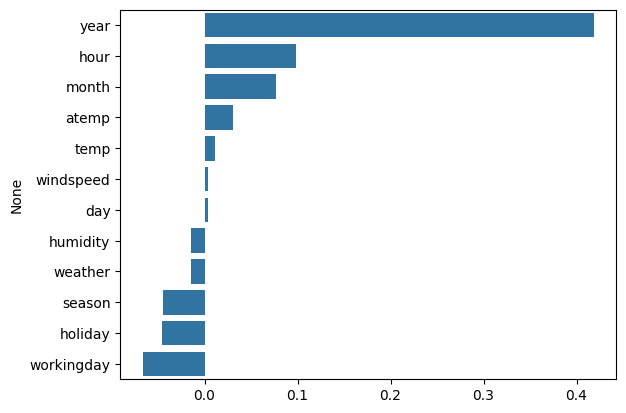

In [45]:
coef=pd.Series(lr_reg.coef_, index= X_features.columns)
coef_sort= coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

사이킷런은 카테고리만을 위한 데이터 타입이 없으며 모두 숫자로 변환해야 한다. 그렇지만 이처럼 숫자형 카테고리 값을 선형회귀에 사용할 경우 회귀계수를연산할 때 이 숫자형 값에 크게 영향을 받는 경우가 발생한다.

따라서 선형 회귀에서는 이런 피처 인코딩에 원핫인코딩을 적용해야 한다.

In [47]:
X_features_ohe=pd.get_dummies(X_features, columns=['year','month','day','hour','holiday',
                                                   'workingday','season','weather'])
X_train, X_test, y_train, y_test= train_test_split(X_features_ohe, y_target_log,
                                                   test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train, y_train)
  pred= model.predict(X_test)
  if is_expm1:
    y_test = np.expm1(y_test)
    pred= np.expm1(pred)
  print('###', model.__class__.__name__, '###')
  evaluate_regr(y_test, pred)


lr_reg= LinearRegression()
ridge_reg= Ridge(alpha=10)
lasso_reg= Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.688, MAE : 63.382
### Ridge ###
RMSLE : 0.590, RMSE : 98.529, MAE : 63.893
### Lasso ###
RMSLE : 0.635, RMSE : 113.219, MAE : 72.803


<Axes: ylabel='None'>

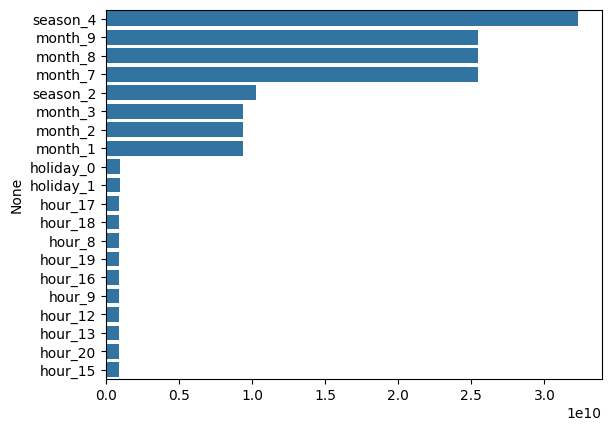

In [48]:
coef = pd.Series(lr_reg.coef_, index= X_features_ohe.columns)
coef_sort= coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

XGBoost의 경우 데이터프레임이 학습/테스트 데이터로 입력될 경우 버젼에 따라 오류 발생 가능

In [49]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg= RandomForestRegressor(n_estimators=500)
gbm_reg= GradientBoostingRegressor(n_estimators=500)
xgb_reg= XGBRegressor(n_estimators=500)
lgbm_reg= LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE : 0.354, RMSE : 50.503, MAE : 31.262
### GradientBoostingRegressor ###
RMSLE : 0.330, RMSE : 53.316, MAE : 32.730
### XGBRegressor ###
RMSLE : 0.339, RMSE : 51.475, MAE : 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE : 0.319, RMSE : 47.215, MAE : 29.029
